In [214]:
#Download all libraries 
import pandas as pd
import numpy as np

from numpy import mean
from numpy import std

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

#%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

plt.rcParams['figure.dpi'] = 100   
plt.rcParams['savefig.dpi'] = 100

In [215]:
#Download the dataset 
Bike_Sharing_hour= pd.read_csv('/Users/nataliemac/Desktop/VCS/Python/05_Capital_Bike_Share/Bike-Sharing-Dataset/hour.csv')

Bike_Sharing_hour

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


 #Sustained wind speeds of 21 to 25 mph, or frequent wind gusts of 30 to 35 mph.

In [216]:

#Change column names:
Bike_Sharing_hour = Bike_Sharing_hour.rename(columns={'hr': 'hour'})
Bike_Sharing_hour = Bike_Sharing_hour.rename(columns={'mnth': 'month'})
Bike_Sharing_hour = Bike_Sharing_hour.rename(columns={'yr': 'year'})
Bike_Sharing_hour = Bike_Sharing_hour.rename(columns={'cnt': 'total'})
Bike_Sharing_hour = Bike_Sharing_hour.rename(columns={'weathersit': 'weather'})
Bike_Sharing_hour = Bike_Sharing_hour.rename(columns={'hum': 'humidity'})
Bike_Sharing_hour = Bike_Sharing_hour.rename(columns={'casual': 'non_member'})
Bike_Sharing_hour = Bike_Sharing_hour.rename(columns={'registered': 'member'})


#Convert Data names and coloumns 
Bike_Sharing_hour.loc[Bike_Sharing_hour['season'] == 1, 'season'] = 'Winter'
Bike_Sharing_hour.loc[Bike_Sharing_hour['season'] == 2, 'season'] = 'Spring'
Bike_Sharing_hour.loc[Bike_Sharing_hour['season'] == 3, 'season'] = 'Summer'
Bike_Sharing_hour.loc[Bike_Sharing_hour['season'] == 4, 'season'] = 'Fall'
Bike_Sharing_hour.loc[Bike_Sharing_hour['month'] == 1, 'month'] = 'Jan'
Bike_Sharing_hour.loc[Bike_Sharing_hour['month'] == 2, 'month'] = 'Feb'
Bike_Sharing_hour.loc[Bike_Sharing_hour['month'] == 3, 'month'] = 'March'
Bike_Sharing_hour.loc[Bike_Sharing_hour['month'] == 4, 'month'] = 'April'
Bike_Sharing_hour.loc[Bike_Sharing_hour['month'] == 5, 'month'] = 'May'
Bike_Sharing_hour.loc[Bike_Sharing_hour['month'] == 6, 'month'] = 'June'
Bike_Sharing_hour.loc[Bike_Sharing_hour['month'] == 7, 'month'] = 'July'
Bike_Sharing_hour.loc[Bike_Sharing_hour['month'] == 8, 'month'] = 'August'
Bike_Sharing_hour.loc[Bike_Sharing_hour['month'] == 9, 'month'] = 'Sep'
Bike_Sharing_hour.loc[Bike_Sharing_hour['month'] == 10, 'month'] = 'Oct'
Bike_Sharing_hour.loc[Bike_Sharing_hour['month'] == 11, 'month'] = 'Nov'
Bike_Sharing_hour.loc[Bike_Sharing_hour['month'] == 12, 'month'] = 'Dec'
Bike_Sharing_hour.loc[Bike_Sharing_hour['workingday'] == 0, 'workingday'] ='Weekend or Holiday'
Bike_Sharing_hour.loc[Bike_Sharing_hour['workingday'] == 1, 'workingday'] ='Weekday'
Bike_Sharing_hour.loc[Bike_Sharing_hour['holiday'] == 1, 'holiday'] = 'No'
Bike_Sharing_hour.loc[Bike_Sharing_hour['holiday'] == 0, 'holiday'] = 'Yes'
Bike_Sharing_hour.loc[Bike_Sharing_hour['year'] == 0, 'year'] = '2011'
Bike_Sharing_hour.loc[Bike_Sharing_hour['year'] == 1, 'year'] = '2012'
Bike_Sharing_hour.loc[Bike_Sharing_hour['weekday'] == 0, 'weekday'] = 'Sun'
Bike_Sharing_hour.loc[Bike_Sharing_hour['weekday'] == 1, 'weekday'] = 'Mon'
Bike_Sharing_hour.loc[Bike_Sharing_hour['weekday'] == 2, 'weekday'] = 'Tue'
Bike_Sharing_hour.loc[Bike_Sharing_hour['weekday'] == 3, 'weekday'] = 'Wed'
Bike_Sharing_hour.loc[Bike_Sharing_hour['weekday'] == 4, 'weekday'] = 'Thu'
Bike_Sharing_hour.loc[Bike_Sharing_hour['weekday'] == 5, 'weekday'] = 'Fri'
Bike_Sharing_hour.loc[Bike_Sharing_hour['weekday'] == 6, 'weekday'] = 'Sat'
Bike_Sharing_hour.loc[Bike_Sharing_hour['weather'] == 1, 'weather'] = 'Clear'
Bike_Sharing_hour.loc[Bike_Sharing_hour['weather'] == 2, 'weather'] = 'Mist'
Bike_Sharing_hour.loc[Bike_Sharing_hour['weather'] == 3, 'weather'] = 'Light'
Bike_Sharing_hour.loc[Bike_Sharing_hour['weather'] == 4, 'weather'] = 'Heavy'


Bike_Sharing_hour


,instant,dteday,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,non_member,member,total
0,1,2011-01-01,Winter,2011,Jan,0,Yes,Sat,Weekend or Holiday,Clear,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,Winter,2011,Jan,1,Yes,Sat,Weekend or Holiday,Clear,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,Winter,2011,Jan,2,Yes,Sat,Weekend or Holiday,Clear,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,Winter,2011,Jan,3,Yes,Sat,Weekend or Holiday,Clear,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,Winter,2011,Jan,4,Yes,Sat,Weekend or Holiday,Clear,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,Winter,2012,Dec,19,Yes,Mon,Weekday,Mist,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,Winter,2012,Dec,20,Yes,Mon,Weekday,Mist,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,Winter,2012,Dec,21,Yes,Mon,Weekday,Clear,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,Winter,2012,Dec,22,Yes,Mon,Weekday,Clear,0.26,0.2727,0.56,0.1343,13,48,61


In [217]:
#Denormalize temp, atemp and wind values 

Bike_Sharing_hour['temp_c'] = Bike_Sharing_hour['temp'] * (39 + 8) - 8
Bike_Sharing_hour['atemp_c'] = Bike_Sharing_hour['atemp'] * (50 + 16) -16
Bike_Sharing_hour['windspeed'] = Bike_Sharing_hour['windspeed'] * (50 + 16) -16
Bike_Sharing_hour['windspeed'] = Bike_Sharing_hour['windspeed'] * 67


display(Bike_Sharing_hour) 



,instant,dteday,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,non_member,member,total,temp_c,atemp_c
0,1,2011-01-01,Winter,2011,Jan,0,Yes,Sat,Weekend or Holiday,Clear,0.24,0.2879,0.81,-1072.0000,3,13,16,3.28,3.0014
1,2,2011-01-01,Winter,2011,Jan,1,Yes,Sat,Weekend or Holiday,Clear,0.22,0.2727,0.80,-1072.0000,8,32,40,2.34,1.9982
2,3,2011-01-01,Winter,2011,Jan,2,Yes,Sat,Weekend or Holiday,Clear,0.22,0.2727,0.80,-1072.0000,5,27,32,2.34,1.9982
3,4,2011-01-01,Winter,2011,Jan,3,Yes,Sat,Weekend or Holiday,Clear,0.24,0.2879,0.75,-1072.0000,3,10,13,3.28,3.0014
4,5,2011-01-01,Winter,2011,Jan,4,Yes,Sat,Weekend or Holiday,Clear,0.24,0.2879,0.75,-1072.0000,0,1,1,3.28,3.0014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,Winter,2012,Dec,19,Yes,Mon,Weekday,Mist,0.26,0.2576,0.60,-345.9076,11,108,119,4.22,1.0016
17375,17376,2012-12-31,Winter,2012,Dec,20,Yes,Mon,Weekday,Mist,0.26,0.2576,0.60,-345.9076,8,81,89,4.22,1.0016
17376,17377,2012-12-31,Winter,2012,Dec,21,Yes,Mon,Weekday,Clear,0.26,0.2576,0.60,-345.9076,7,83,90,4.22,1.0016
17377,17378,2012-12-31,Winter,2012,Dec,22,Yes,Mon,Weekday,Clear,0.26,0.2727,0.56,-478.1254,13,48,61,4.22,1.9982


# Data Wrangling

In [218]:
Bike_Sharing_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  object 
 3   year        17379 non-null  object 
 4   month       17379 non-null  object 
 5   hour        17379 non-null  int64  
 6   holiday     17379 non-null  object 
 7   weekday     17379 non-null  object 
 8   workingday  17379 non-null  object 
 9   weather     17379 non-null  object 
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  humidity    17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  non_member  17379 non-null  int64  
 15  member      17379 non-null  int64  
 16  total       17379 non-null  int64  
 17  temp_c      17379 non-null  float64
 18  atemp_c     17379 non-null  float64
dtypes: float64(6), int64(5), 

In [219]:
Bike_Sharing_hour.head()

,instant,dteday,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,non_member,member,total,temp_c,atemp_c
0,1,2011-01-01,Winter,2011,Jan,0,Yes,Sat,Weekend or Holiday,Clear,0.24,0.2879,0.81,-1072.0,3,13,16,3.28,3.0014
1,2,2011-01-01,Winter,2011,Jan,1,Yes,Sat,Weekend or Holiday,Clear,0.22,0.2727,0.80,-1072.0,8,32,40,2.34,1.9982
2,3,2011-01-01,Winter,2011,Jan,2,Yes,Sat,Weekend or Holiday,Clear,0.22,0.2727,0.80,-1072.0,5,27,32,2.34,1.9982
3,4,2011-01-01,Winter,2011,Jan,3,Yes,Sat,Weekend or Holiday,Clear,0.24,0.2879,0.75,-1072.0,3,10,13,3.28,3.0014
4,5,2011-01-01,Winter,2011,Jan,4,Yes,Sat,Weekend or Holiday,Clear,0.24,0.2879,0.75,-1072.0,0,1,1,3.28,3.0014


In [220]:
Bike_Sharing_hour.tail()

,instant,dteday,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,non_member,member,total,temp_c,atemp_c
17374,17375,2012-12-31,Winter,2012,Dec,19,Yes,Mon,Weekday,Mist,0.26,0.2576,0.60,-345.9076,11,108,119,4.22,1.0016
17375,17376,2012-12-31,Winter,2012,Dec,20,Yes,Mon,Weekday,Mist,0.26,0.2576,0.60,-345.9076,8,81,89,4.22,1.0016
17376,17377,2012-12-31,Winter,2012,Dec,21,Yes,Mon,Weekday,Clear,0.26,0.2576,0.60,-345.9076,7,83,90,4.22,1.0016
17377,17378,2012-12-31,Winter,2012,Dec,22,Yes,Mon,Weekday,Clear,0.26,0.2727,0.56,-478.1254,13,48,61,4.22,1.9982
17378,17379,2012-12-31,Winter,2012,Dec,23,Yes,Mon,Weekday,Clear,0.26,0.2727,0.65,-478.1254,12,37,49,4.22,1.9982


In [221]:
Bike_Sharing_hour.shape

(17379, 19)

In [222]:
# count missing values for red_wine dataset
missing_values_count = Bike_Sharing_hour.isnull().sum()

print(missing_values_count)

total_missing = missing_values_count.sum()

print(f'Total missing values: {total_missing}')

instant       0
dteday        0
season        0
year          0
month         0
hour          0
holiday       0
weekday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
non_member    0
member        0
total         0
temp_c        0
atemp_c       0
dtype: int64
Total missing values: 0


#No missing values

In [223]:
# print the number of duplicates in the datasets

print('Number of duplicates in dataset: ', Bike_Sharing_hour.duplicated().sum())

Number of duplicates in dataset:  0


#No Duplicates

In [224]:
Bike_Sharing_hour.describe()

,instant,hour,temp,atemp,humidity,windspeed,non_member,member,total,temp_c,atemp_c
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,11.546752,0.496987,0.475775,0.627229,-231.388385,35.676218,153.786869,189.463088,15.358397,15.401157
std,5017.0295,6.914405,0.192556,0.171850,0.192930,540.988491,49.305030,151.357286,181.387599,9.050138,11.342114
min,1.0000,0.000000,0.020000,0.000000,0.000000,-1072.000000,0.000000,0.000000,1.000000,-7.060000,-16.000000
25%,4345.5000,6.000000,0.340000,0.333300,0.480000,-609.901000,4.000000,34.000000,40.000000,7.980000,5.997800
50%,8690.0000,12.000000,0.500000,0.484800,0.630000,-214.132000,17.000000,115.000000,142.000000,15.500000,15.996800
75%,13034.5000,18.000000,0.660000,0.621200,0.780000,49.861400,48.000000,220.000000,281.000000,23.020000,24.999200
max,17379.0000,23.000000,1.000000,1.000000,1.000000,2689.795400,367.000000,886.000000,977.000000,39.000000,50.000000


In [225]:
Bike_Sharing_hour.weekday.value_counts()

Sat    2512
Sun    2502
Fri    2487
Mon    2479
Wed    2475
Thu    2471
Tue    2453
Name: weekday, dtype: int64

In [226]:
Bike_Sharing_hour.weekday.value_counts()

Sat    2512
Sun    2502
Fri    2487
Mon    2479
Wed    2475
Thu    2471
Tue    2453
Name: weekday, dtype: int64

In [227]:
Bike_Sharing_hour.month.value_counts()

May       1488
July      1488
Dec       1483
August    1475
March     1473
Oct       1451
June      1440
April     1437
Sep       1437
Nov       1437
Jan       1429
Feb       1341
Name: month, dtype: int64

In [228]:
# convert the 'dteday' column to a datetime object
Bike_Sharing_hour['dteday'] = pd.to_datetime(Bike_Sharing_hour['dteday'])
Bike_Sharing_hour

,instant,dteday,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,non_member,member,total,temp_c,atemp_c
0,1,2011-01-01,Winter,2011,Jan,0,Yes,Sat,Weekend or Holiday,Clear,0.24,0.2879,0.81,-1072.0000,3,13,16,3.28,3.0014
1,2,2011-01-01,Winter,2011,Jan,1,Yes,Sat,Weekend or Holiday,Clear,0.22,0.2727,0.80,-1072.0000,8,32,40,2.34,1.9982
2,3,2011-01-01,Winter,2011,Jan,2,Yes,Sat,Weekend or Holiday,Clear,0.22,0.2727,0.80,-1072.0000,5,27,32,2.34,1.9982
3,4,2011-01-01,Winter,2011,Jan,3,Yes,Sat,Weekend or Holiday,Clear,0.24,0.2879,0.75,-1072.0000,3,10,13,3.28,3.0014
4,5,2011-01-01,Winter,2011,Jan,4,Yes,Sat,Weekend or Holiday,Clear,0.24,0.2879,0.75,-1072.0000,0,1,1,3.28,3.0014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,Winter,2012,Dec,19,Yes,Mon,Weekday,Mist,0.26,0.2576,0.60,-345.9076,11,108,119,4.22,1.0016
17375,17376,2012-12-31,Winter,2012,Dec,20,Yes,Mon,Weekday,Mist,0.26,0.2576,0.60,-345.9076,8,81,89,4.22,1.0016
17376,17377,2012-12-31,Winter,2012,Dec,21,Yes,Mon,Weekday,Clear,0.26,0.2576,0.60,-345.9076,7,83,90,4.22,1.0016
17377,17378,2012-12-31,Winter,2012,Dec,22,Yes,Mon,Weekday,Clear,0.26,0.2727,0.56,-478.1254,13,48,61,4.22,1.9982


In [229]:
Bike_Sharing_hour['dteday'] = pd.to_datetime(Bike_Sharing_hour['dteday'], format='%Y-%m-%d')
Bike_Sharing_hour

,instant,dteday,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,non_member,member,total,temp_c,atemp_c
0,1,2011-01-01,Winter,2011,Jan,0,Yes,Sat,Weekend or Holiday,Clear,0.24,0.2879,0.81,-1072.0000,3,13,16,3.28,3.0014
1,2,2011-01-01,Winter,2011,Jan,1,Yes,Sat,Weekend or Holiday,Clear,0.22,0.2727,0.80,-1072.0000,8,32,40,2.34,1.9982
2,3,2011-01-01,Winter,2011,Jan,2,Yes,Sat,Weekend or Holiday,Clear,0.22,0.2727,0.80,-1072.0000,5,27,32,2.34,1.9982
3,4,2011-01-01,Winter,2011,Jan,3,Yes,Sat,Weekend or Holiday,Clear,0.24,0.2879,0.75,-1072.0000,3,10,13,3.28,3.0014
4,5,2011-01-01,Winter,2011,Jan,4,Yes,Sat,Weekend or Holiday,Clear,0.24,0.2879,0.75,-1072.0000,0,1,1,3.28,3.0014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,Winter,2012,Dec,19,Yes,Mon,Weekday,Mist,0.26,0.2576,0.60,-345.9076,11,108,119,4.22,1.0016
17375,17376,2012-12-31,Winter,2012,Dec,20,Yes,Mon,Weekday,Mist,0.26,0.2576,0.60,-345.9076,8,81,89,4.22,1.0016
17376,17377,2012-12-31,Winter,2012,Dec,21,Yes,Mon,Weekday,Clear,0.26,0.2576,0.60,-345.9076,7,83,90,4.22,1.0016
17377,17378,2012-12-31,Winter,2012,Dec,22,Yes,Mon,Weekday,Clear,0.26,0.2727,0.56,-478.1254,13,48,61,4.22,1.9982


#Based on this dataset we can investigate: 

Seasonal variations in bike rentals
Trends in bike rentals based on year, month, and hour
Differences in bike rentals on holidays versus non-holidays
Differences in bike rentals on working days versus non-working days
The relationship between weather conditions (weathersit) and bike rentals
The relationship between temperature, humidity, and windspeed with bike rentals
Differences in bike rentals between casual riders and registered riders

In [230]:
#Check the data types of all columns:
 
Bike_Sharing_hour.dtypes



instant                int64
dteday        datetime64[ns]
season                object
year                  object
month                 object
hour                   int64
holiday               object
weekday               object
workingday            object
weather               object
temp                 float64
atemp                float64
humidity             float64
windspeed            float64
non_member             int64
member                 int64
total                  int64
temp_c               float64
atemp_c              float64
dtype: object

In [231]:
#Check the data types of all columns:
 
Bike_Sharing_hour.dtypes


instant                int64
dteday        datetime64[ns]
season                object
year                  object
month                 object
hour                   int64
holiday               object
weekday               object
workingday            object
weather               object
temp                 float64
atemp                float64
humidity             float64
windspeed            float64
non_member             int64
member                 int64
total                  int64
temp_c               float64
atemp_c              float64
dtype: object

KPIs:

# Data Visualisation

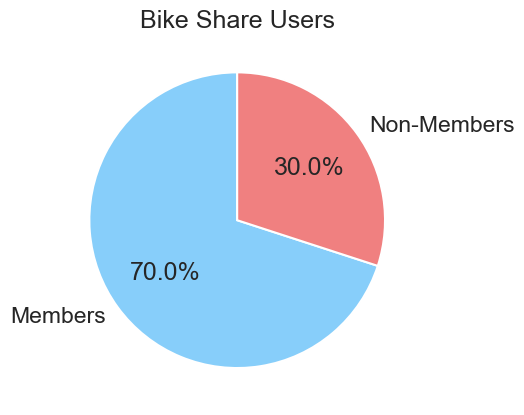

In [261]:
#Members vs. Non Members count

# Create data
labels = ['Members', 'Non-Members']
sizes = [70, 30]
colors = ['#87CEFA', '#F08080'] # pastel blue and pink

# Plot
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Add title
plt.title('Bike Share Users')

# Show plot
plt.show()


Text(0.5, 1.0, 'Relationship between Weekday and Bike Share Members')

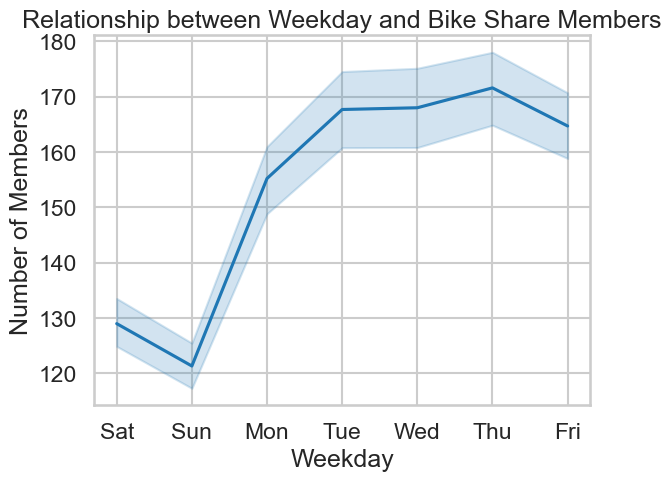

In [232]:
##Check the distribution of weekdays for members
weekday_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
sns.lineplot(data=Bike_Sharing_hour, x='weekday', y='member')
plt.xlabel('Weekday')
plt.ylabel('Number of Members')
plt.title('Relationship between Weekday and Bike Share Members')


Text(0.5, 1.0, 'Weekday Bike Share Distribution for Non-Members')

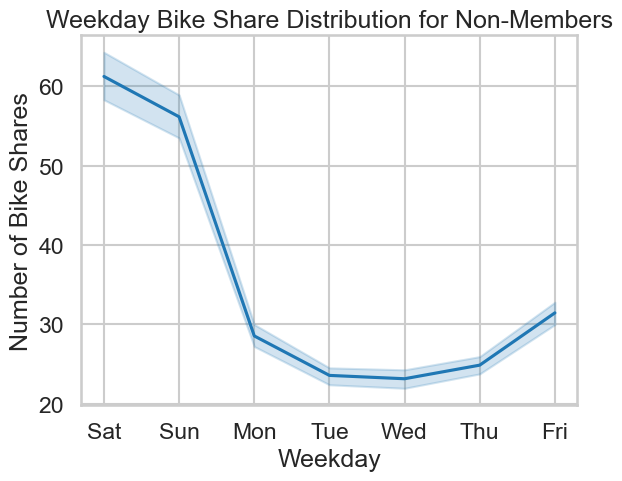

In [233]:
##Check the distribution of weekdays for non members

sns.lineplot(data=Bike_Sharing_hour, x='weekday', y='non_member')
weekday_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.xlabel('Weekday')
plt.ylabel('Number of Bike Shares')
plt.title('Weekday Bike Share Distribution for Non-Members')


Text(0.5, 1.0, 'Distribution of Bike Share Rides per Non Members by Weekday')

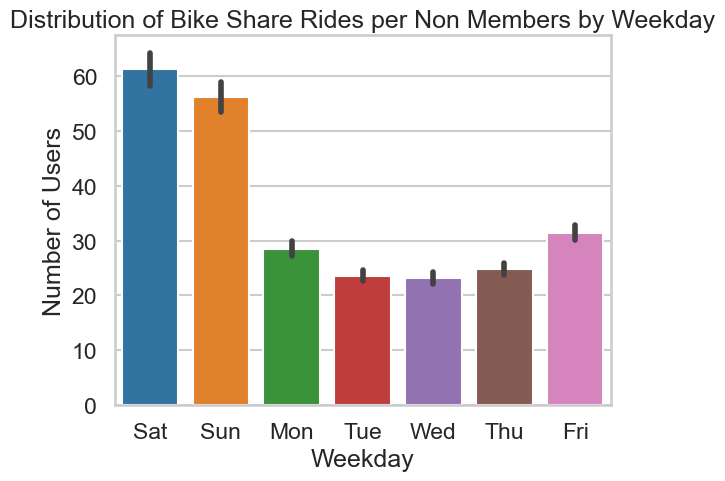

In [234]:
sns.barplot(data=Bike_Sharing_hour, x='weekday', y='non_member')
plt.xlabel('Weekday')
plt.ylabel('Number of Users')
plt.title('Distribution of Bike Share Rides per Non Members by Weekday')



Text(0.5, 1.0, 'Distribution of Bike Share Rides per Non Members by Weekday')

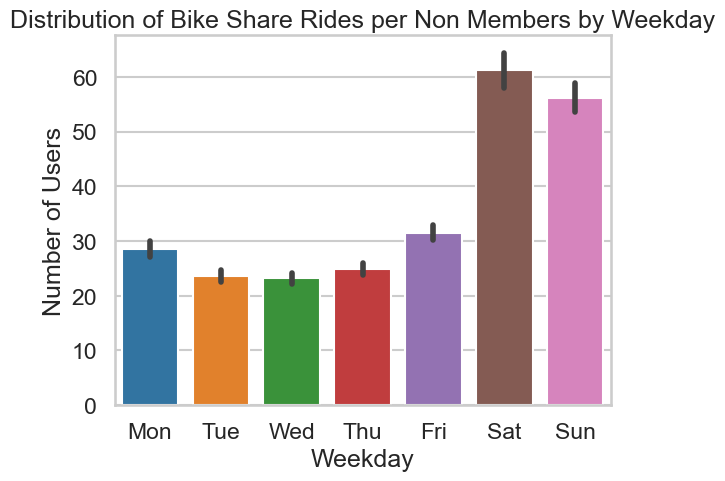

In [235]:
weekday_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

sns.barplot(data=Bike_Sharing_hour, x='weekday', y='non_member', order=weekday_order)
plt.xlabel('Weekday')
plt.ylabel('Number of Users')
plt.title('Distribution of Bike Share Rides per Non Members by Weekday')


Text(0.5, 1.0, 'Distribution of Bike Share Rides per Non Members by Weekday')

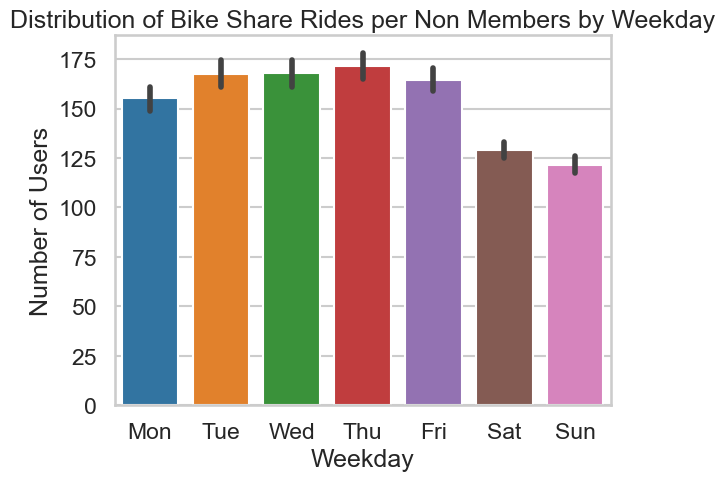

In [236]:
weekday_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

sns.barplot(data=Bike_Sharing_hour, x='weekday', y='member', order=weekday_order)
plt.xlabel('Weekday')
plt.ylabel('Number of Users')
plt.title('Distribution of Bike Share Rides per Non Members by Weekday')


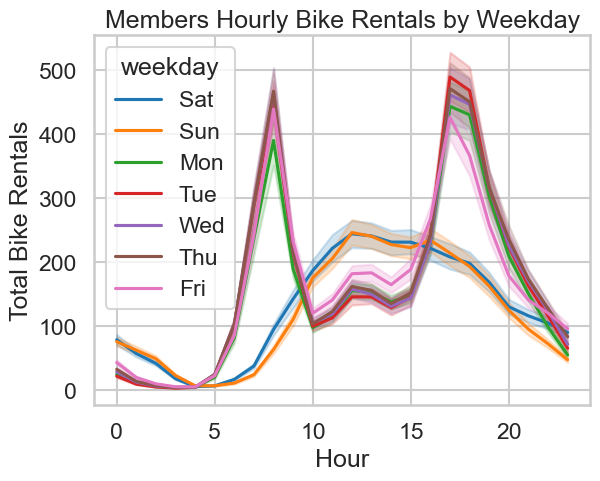

In [237]:
 
# Set style and context for seaborn
sns.set_style('whitegrid')
sns.set_context('talk')

# Create lineplot
sns.lineplot(data=Bike_Sharing_hour, x='hour', y='member', hue='weekday')

# Add labels and title
plt.xlabel('Hour')
plt.ylabel('Total Bike Rentals')
plt.title('Members Hourly Bike Rentals by Weekday')

# Show plot
plt.show()

#Peak time between 7-9 and 16-18 on weekdays. Members tend to use more to commute to work and back

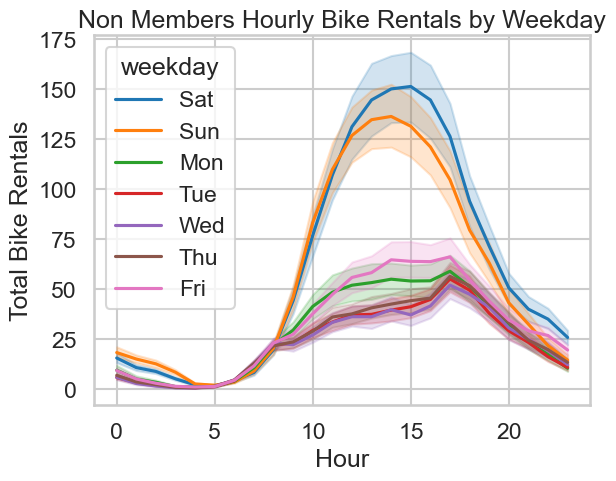

In [238]:
 
# Set style and context for seaborn
sns.set_style('whitegrid')
sns.set_context('talk')

# Create lineplot
sns.lineplot(data=Bike_Sharing_hour, x='hour', y='non_member', hue='weekday')

# Add labels and title
plt.xlabel('Hour')
plt.ylabel('Total Bike Rentals')
plt.title('Non Members Hourly Bike Rentals by Weekday')

# Show plot
plt.show()

#Peak time - weekends 13-16 

<AxesSubplot:xlabel='season', ylabel='count'>

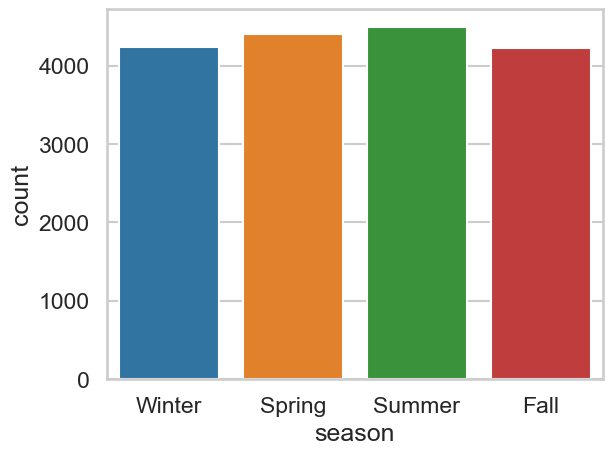

In [239]:
#Check the distribution by season

sns.countplot(data=Bike_Sharing_hour, x='season')

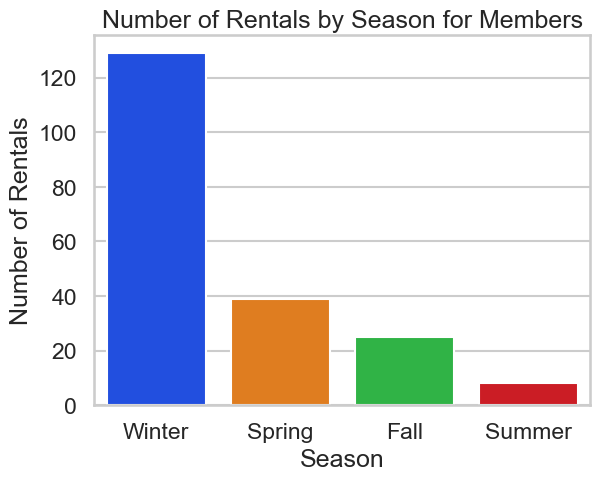

In [240]:
# Filter the data to include only members
member_data = Bike_Sharing_hour[Bike_Sharing_hour['member'] == 1]

# Get the counts of each season for members
season_counts = member_data['season'].value_counts()

# Order the seasons by count
order = season_counts.index.tolist()

# Create the countplot with ordered seasons for members
sns.countplot(data=member_data, x='season', order=order, palette='bright')
plt.title('Number of Rentals by Season for Members')
plt.xlabel('Season')
plt.ylabel('Number of Rentals')
plt.show()



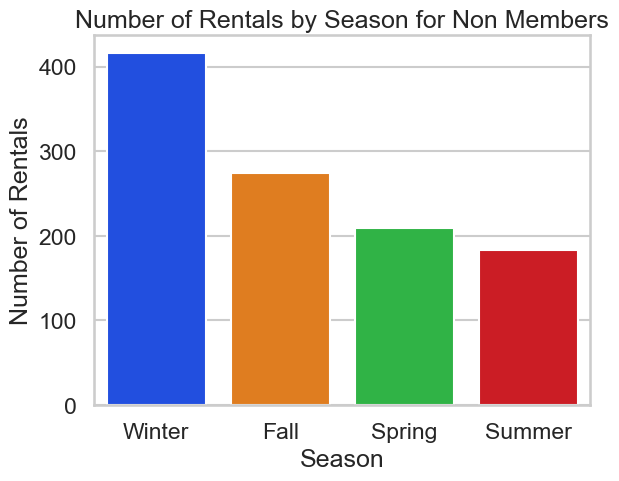

In [241]:
# Filter the data to include only none members
member_data = Bike_Sharing_hour[Bike_Sharing_hour['non_member'] == 1]

# Get the counts of each season for members
season_counts = member_data['season'].value_counts()

# Order the seasons by count
order = season_counts.index.tolist()

# Create the countplot with ordered seasons for members
sns.countplot(data=member_data, x='season', order=order, palette='bright')
plt.title('Number of Rentals by Season for Non Members')
plt.xlabel('Season')
plt.ylabel('Number of Rentals')
plt.show()


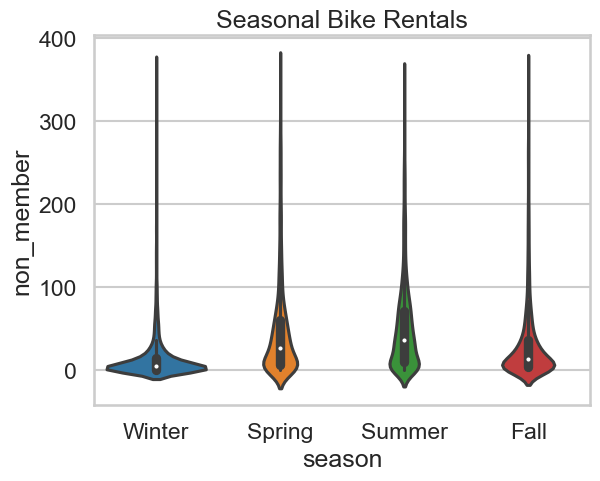

In [262]:
sns.violinplot(x='season', y='non_member', data=Bike_Sharing_hour)
plt.title('Seasonal Bike Rentals')
plt.show()


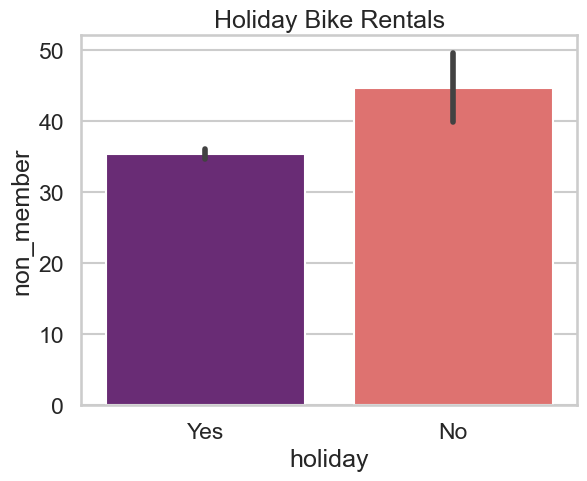

In [ ]:
#Differences in bike rentals on holidays versus non-holidays

sns.barplot(x='holiday', y='non_member', palette='magma', data=Bike_Sharing_hour)
plt.title('Holiday Bike Rentals')
plt.show()

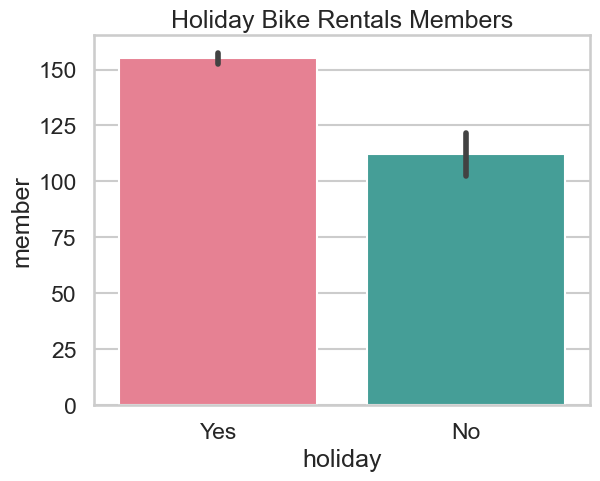

In [ ]:
#Differences in bike rentals on holidays versus non-holidays

sns.barplot(x='holiday', y='member', palette='husl', data=Bike_Sharing_hour)
plt.title('Holiday Bike Rentals Members')
plt.show()


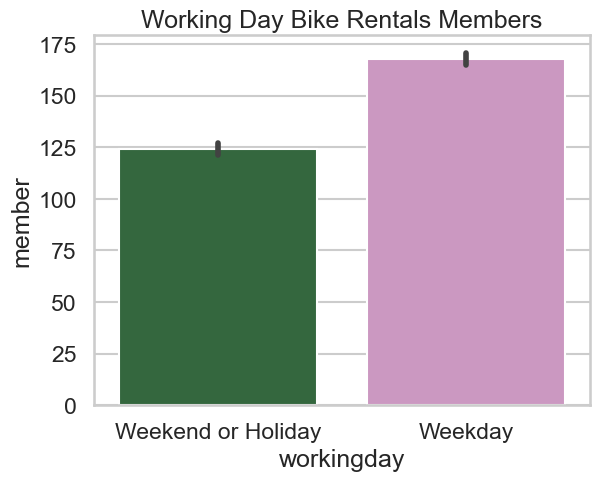

In [ ]:
sns.barplot(x='workingday', y='member', data=Bike_Sharing_hour, palette='cubehelix')
plt.title('Working Day Bike Rentals Members')
plt.show()


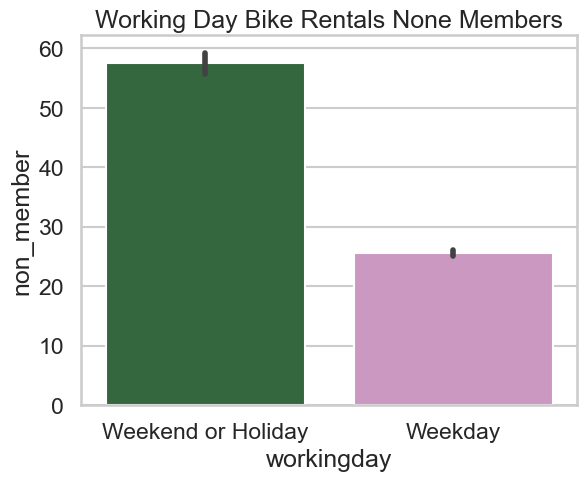

In [ ]:
#Differences in bike rentals on working days versus non-working days

sns.barplot(x='workingday', y='non_member',palette='cubehelix', data=Bike_Sharing_hour)
plt.title('Working Day Bike Rentals None Members')
plt.show()


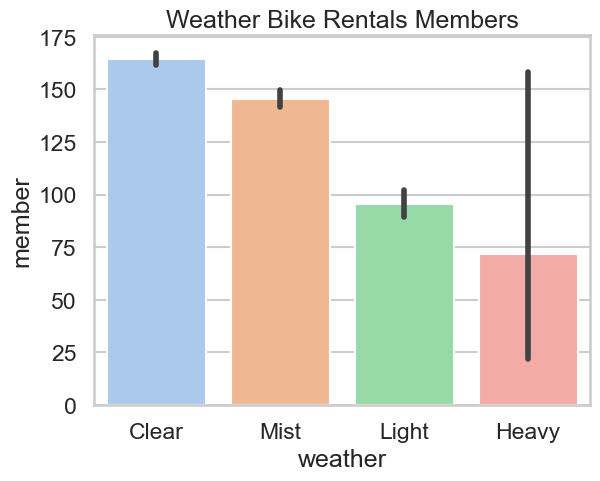

In [ ]:
#The relationship between weather conditions (weathersit) and bike rentals

sns.barplot(x='weather', y='member',palette="pastel", data=Bike_Sharing_hour)
plt.title('Weather Bike Rentals Members')
plt.show()


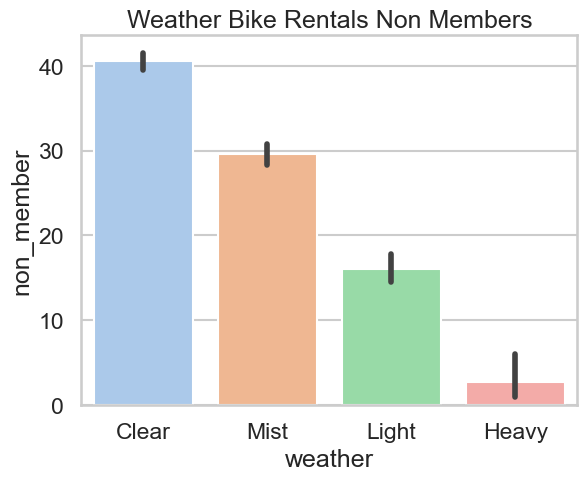

In [ ]:
#The relationship between weather conditions (weathersit) and bike rentals

sns.barplot(x='weather', y='non_member',palette="pastel", data=Bike_Sharing_hour)
plt.title('Weather Bike Rentals Non Members')
plt.show()

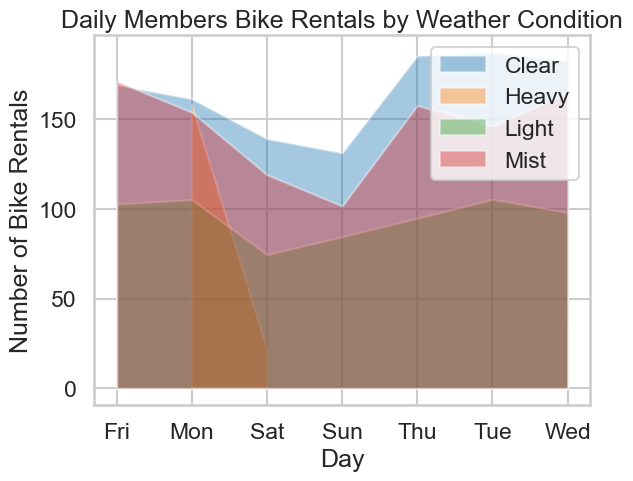

In [ ]:

# Create a pivot table with weather on the x-axis and hour on the y-axis
pivot_table = Bike_Sharing_hour.pivot_table(index='weekday', columns='weather', values='member', aggfunc='mean')

# Create an area plot for each weather condition
for weather in pivot_table.columns:
    plt.fill_between(pivot_table.index, pivot_table[weather], alpha=0.4, label=weather)

# Add plot details
plt.legend()
plt.title('Daily Members Bike Rentals by Weather Condition')
plt.xlabel('Day')
plt.ylabel('Number of Bike Rentals')
plt.show()



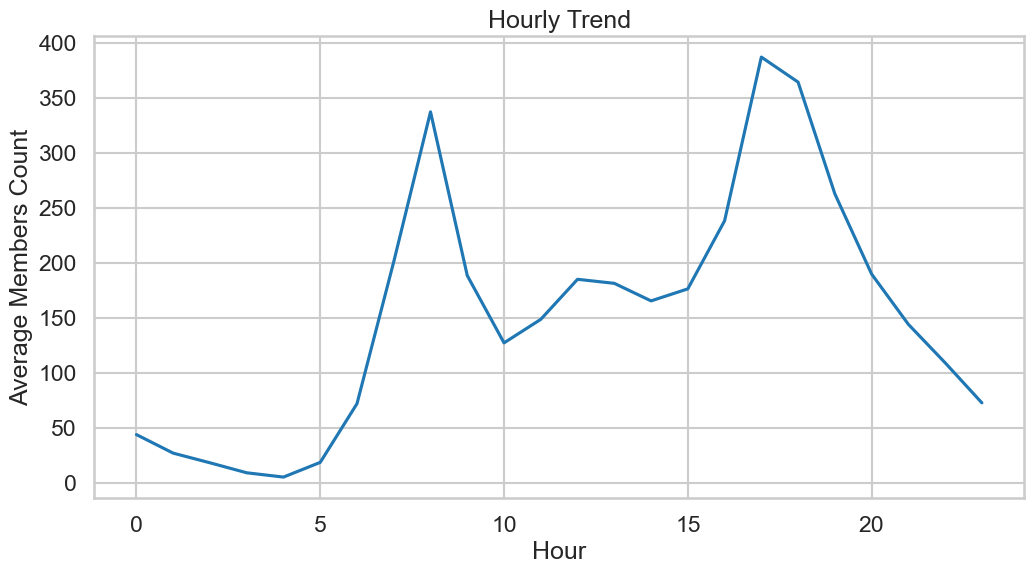

In [ ]:
# Group the data by hour and calculate the average count
hourly_data = Bike_Sharing_hour.groupby('hour')['member'].mean()

# Plot the hourly trend
plt.figure(figsize=(12,6))
sns.lineplot(x=hourly_data.index, y=hourly_data)
plt.xlabel('Hour')
plt.ylabel('Average Members Count')
plt.title('Hourly Trend')
plt.show()


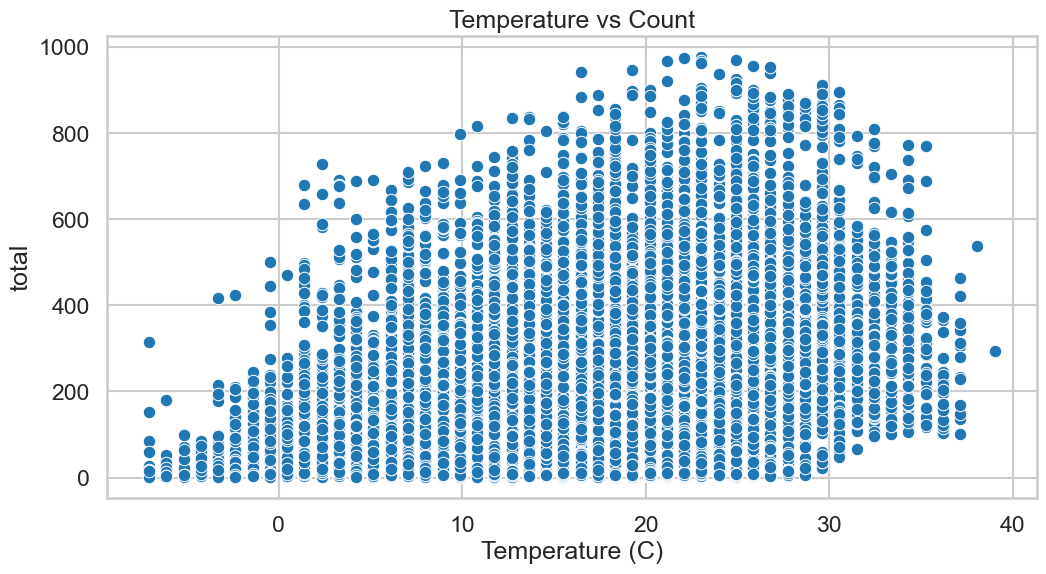

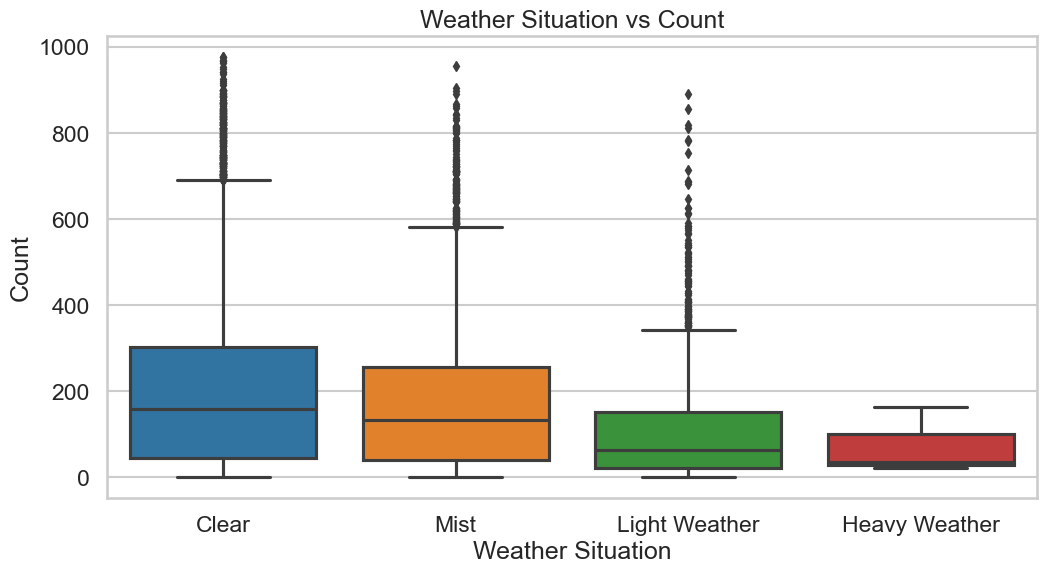

In [ ]:
# Create a scatterplot of count vs temperature
plt.figure(figsize=(12,6))
sns.scatterplot(x='temp_c', y='total', data=Bike_Sharing_hour)
plt.xlabel('Temperature (C)')
plt.ylabel('total')
plt.title('Temperature vs Count')
plt.show()

# Create a boxplot of count vs weather situation
plt.figure(figsize=(12,6))
sns.boxplot(x='weather', y='total', data=Bike_Sharing_hour)
plt.xlabel('Weather Situation')
plt.ylabel('Count')
plt.title('Weather Situation vs Count')
plt.show()


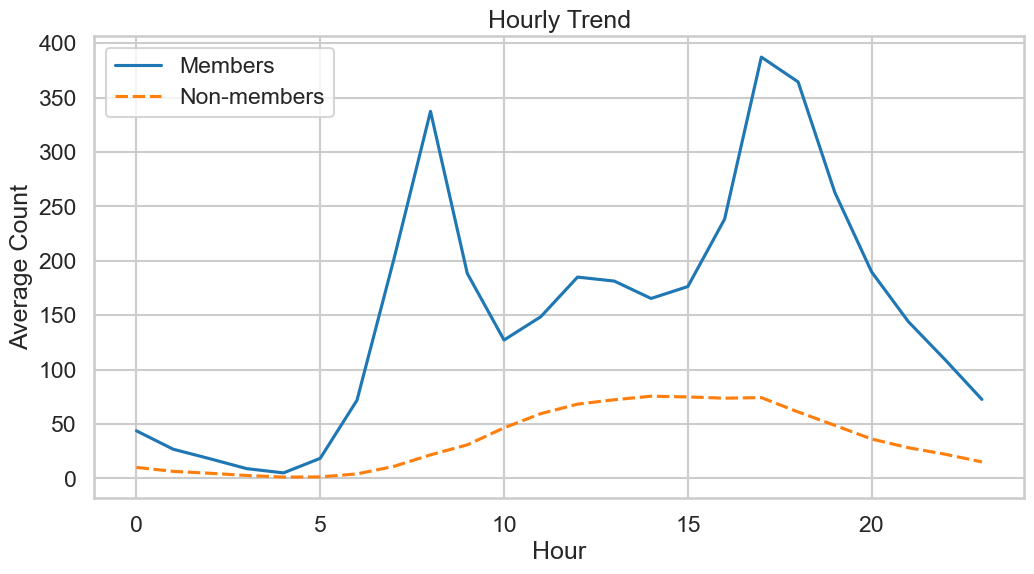

In [ ]:

# Group the data by hour and calculate the average count for members and non-members
hourly_data = Bike_Sharing_hour.groupby('hour')[['member', 'none_member']].mean()

# Plot the hourly trend for members and non-members
plt.figure(figsize=(12,6))
sns.lineplot(data=hourly_data)
plt.xlabel('Hour')
plt.ylabel('Average Count')
plt.title('Hourly Trend')
plt.legend(['Members', 'Non-members'])
plt.show()


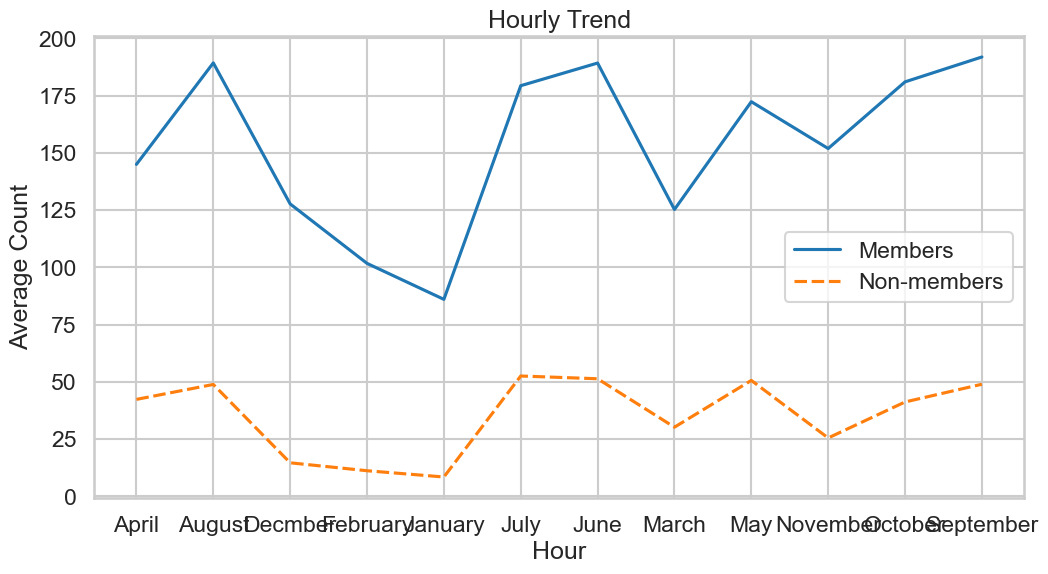

In [ ]:

# Group the data by hour and calculate the average count for members and non-members
hourly_data = Bike_Sharing_hour.groupby('month')[['member', 'non_member']].mean()

# Plot the hourly trend for members and non-members
plt.figure(figsize=(12,6))
sns.lineplot(data=hourly_data)
plt.xlabel('Hour')
plt.ylabel('Average Count')
plt.title('Hourly Trend')
plt.legend(['Members', 'Non-members'])
plt.show()

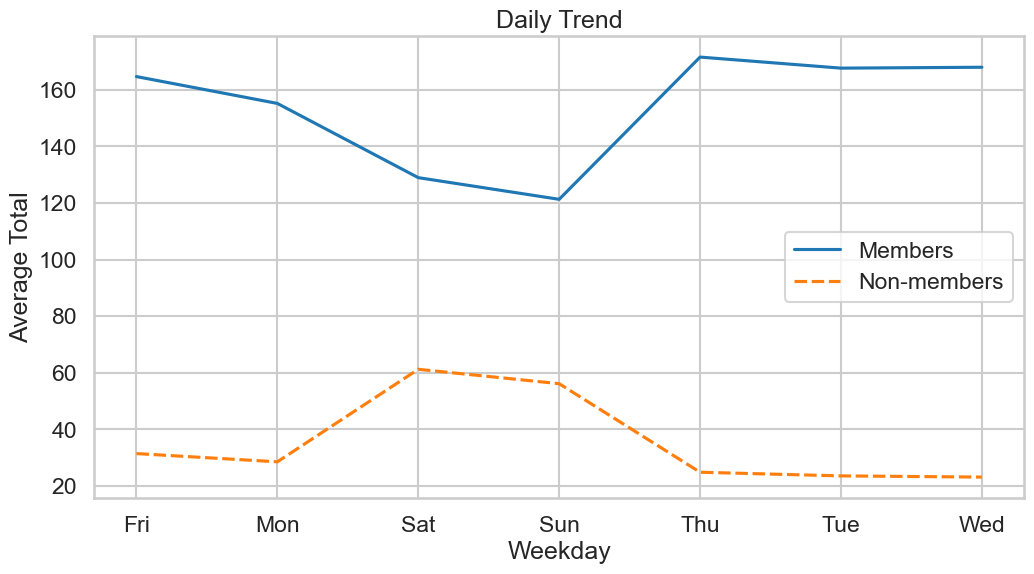

In [ ]:
# Group the data by hour and calculate the average count for members and non-members
hourly_data = Bike_Sharing_hour.groupby('weekday')[['member', 'none_member']].mean()

# Plot the hourly trend for members and non-members
plt.figure(figsize=(12,6))
sns.lineplot(data=hourly_data)
plt.xlabel('Weekday')
plt.ylabel('Average Total')
plt.title('Daily Trend')
plt.legend(['Members', 'Non-members'])
plt.show()


#More none members on weekends

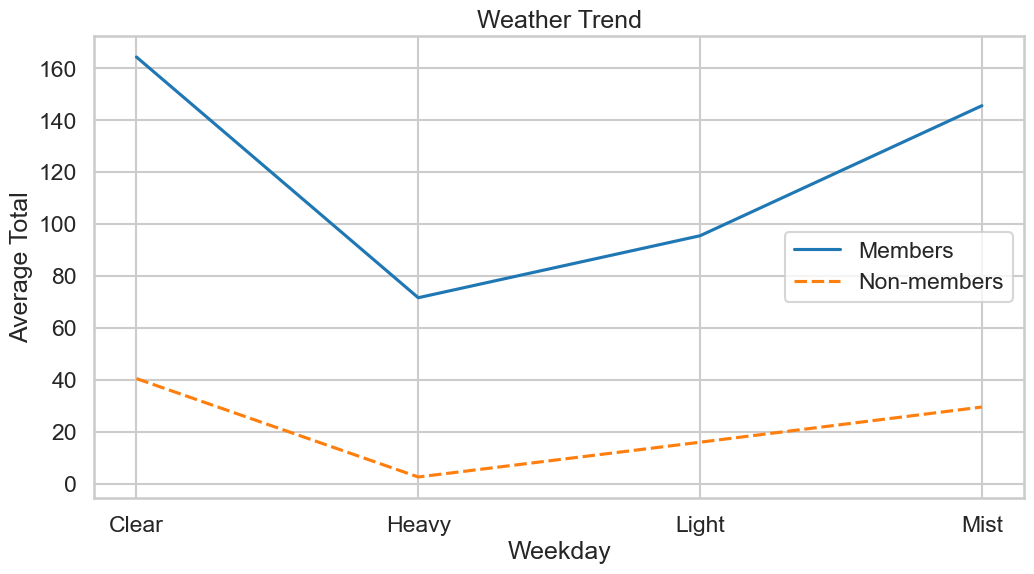

In [ ]:
# Group the data by hour and calculate the average count for members and non-members
hourly_data = Bike_Sharing_hour.groupby('weather')[['member', 'non_member']].mean()

# Plot the hourly trend for members and non-members
plt.figure(figsize=(12,6))
sns.lineplot(data=hourly_data)
plt.xlabel('Weekday')
plt.ylabel('Average Total')
plt.title('Weather Trend')
plt.legend(['Members', 'Non-members'])
plt.show()

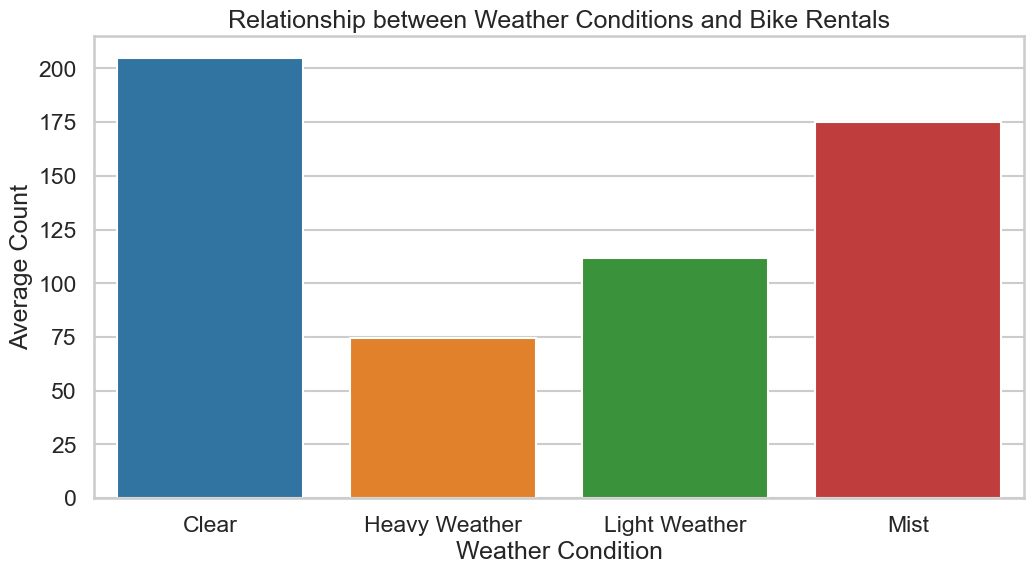

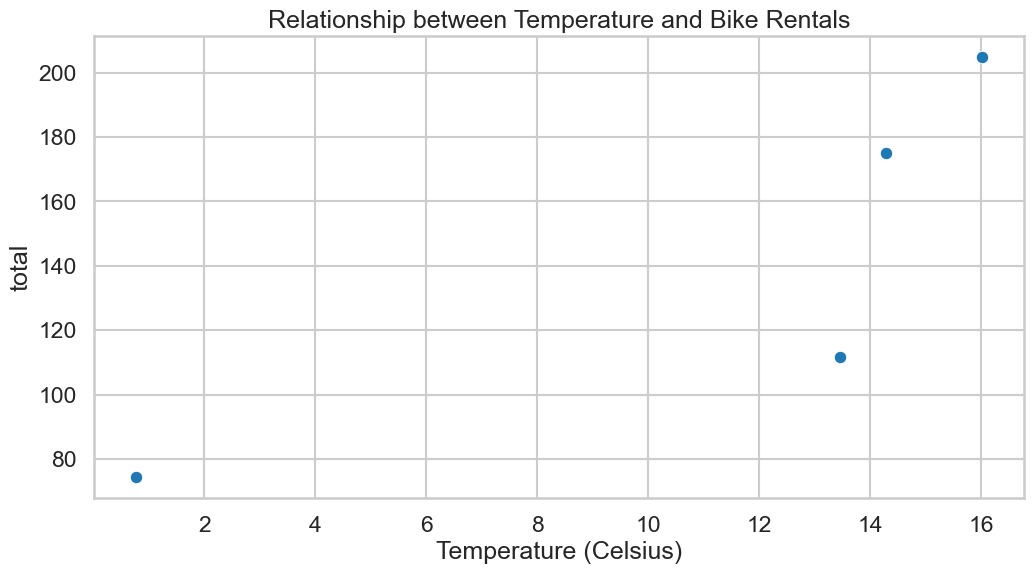

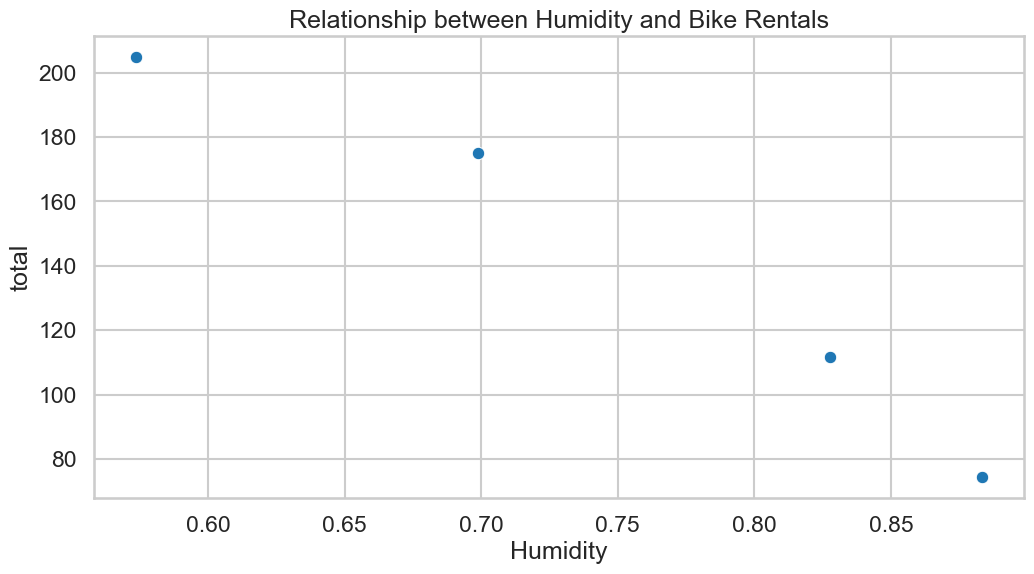

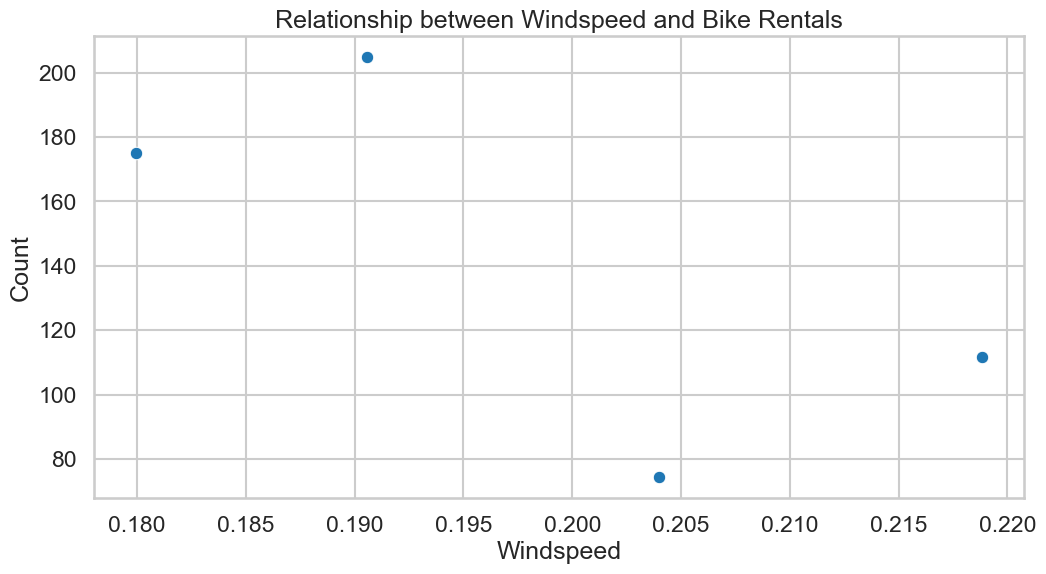

In [ ]:
# Group the data by weather conditions
weather_data = Bike_Sharing_hour.groupby(['weather'])['total', 'temp_c', 'humidity', 'windspeed'].mean().reset_index()

# Plot the relationship between weather conditions and bike rentals
plt.figure(figsize=(12,6))
sns.barplot(x='weather', y='total', data=weather_data)
plt.xlabel('Weather Condition')
plt.ylabel('Average Count')
plt.title('Relationship between Weather Conditions and Bike Rentals')
plt.show()

# Plot the relationship between temperature, humidity, windspeed and bike rentals
plt.figure(figsize=(12,6))
sns.scatterplot(x='temp_c', y='total', data=weather_data)
plt.xlabel('Temperature (Celsius)')
plt.ylabel('total')
plt.title('Relationship between Temperature and Bike Rentals')
plt.show()

plt.figure(figsize=(12,6))
sns.scatterplot(x='humidity', y='total', data=weather_data)
plt.xlabel('Humidity')
plt.ylabel('total')
plt.title('Relationship between Humidity and Bike Rentals')
plt.show()

plt.figure(figsize=(12,6))
sns.scatterplot(x='windspeed', y='total', data=weather_data)
plt.xlabel('Windspeed')
plt.ylabel('Count')
plt.title('Relationship between Windspeed and Bike Rentals')
plt.show()


           humidity  windspeed    temp_c   atemp_c     total
humidity   1.000000  -0.290105 -0.069881 -0.051918 -0.322911
windspeed -0.290105   1.000000 -0.023125 -0.062336  0.093234
temp_c    -0.069881  -0.023125  1.000000  0.987672  0.404772
atemp_c   -0.051918  -0.062336  0.987672  1.000000  0.400929
total     -0.322911   0.093234  0.404772  0.400929  1.000000


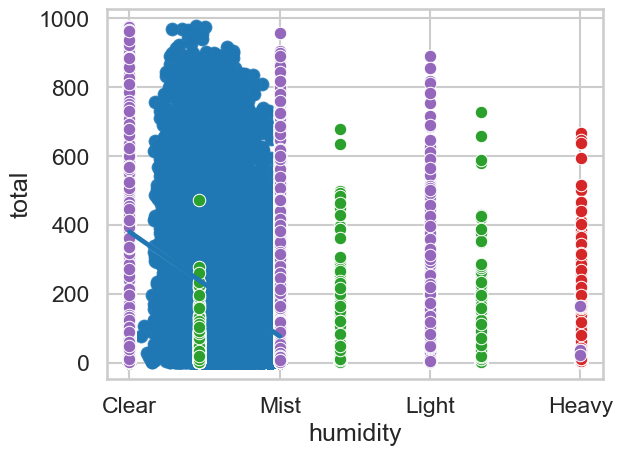

In [244]:

# Create scatterplot of humidity vs. bike rentals
sns.scatterplot(x='humidity', y='total', data=Bike_Sharing_hour)

# Add regression line to scatterplot
sns.regplot(x='humidity', y='total', data=Bike_Sharing_hour)

# Repeat for other variables
sns.scatterplot(x='windspeed', y='total', data=Bike_Sharing_hour)
sns.scatterplot(x='temp_c', y='total', data=Bike_Sharing_hour)
sns.scatterplot(x='atemp_c', y='total', data=Bike_Sharing_hour)
sns.scatterplot(x='weather', y='total', data=Bike_Sharing_hour)

# Calculate correlation coefficients between variables and bike rentals
correlations = Bike_Sharing_hour[['humidity', 'windspeed', 'temp_c', 'atemp_c', 'weather', 'total']].corr()
print(correlations)


           humidity  windspeed    temp_c   atemp_c     total
humidity   1.000000  -0.290105 -0.069881 -0.051918 -0.322911
windspeed -0.290105   1.000000 -0.023125 -0.062336  0.093234
temp_c    -0.069881  -0.023125  1.000000  0.987672  0.404772
atemp_c   -0.051918  -0.062336  0.987672  1.000000  0.400929
total     -0.322911   0.093234  0.404772  0.400929  1.000000


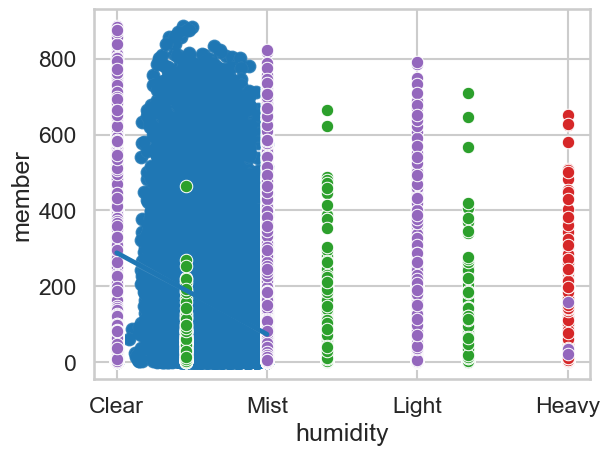

In [246]:

# Create scatterplot of humidity vs. bike rentals
sns.scatterplot(x='humidity', y='member', data=Bike_Sharing_hour)

# Add regression line to scatterplot
sns.regplot(x='humidity', y='member', data=Bike_Sharing_hour)

# Repeat for other variables
sns.scatterplot(x='windspeed', y='member', data=Bike_Sharing_hour)
sns.scatterplot(x='temp_c', y='member', data=Bike_Sharing_hour)
sns.scatterplot(x='atemp_c', y='member', data=Bike_Sharing_hour)
sns.scatterplot(x='weather', y='member', data=Bike_Sharing_hour)

# Calculate correlation coefficients between variables and bike rentals
correlations = Bike_Sharing_hour[['humidity', 'windspeed', 'temp_c', 'atemp_c', 'weather', 'total']].corr()
print(correlations)


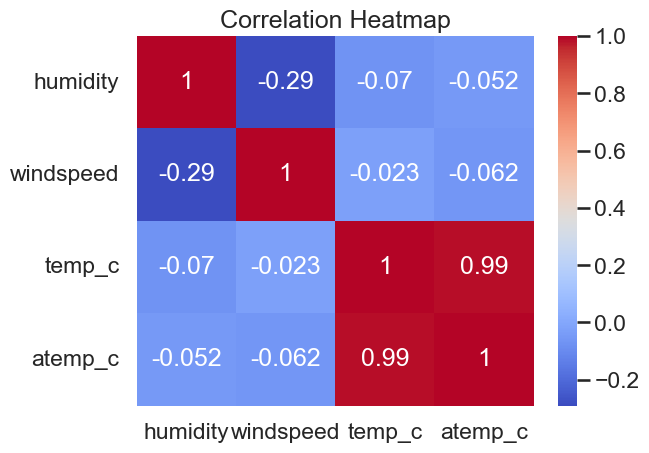

In [247]:


# Calculate correlation matrix
corr_matrix = Bike_Sharing_hour[['humidity', 'windspeed', 'temp_c', 'atemp_c']].corr()

# Create heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


           humidity  windspeed    temp_c   atemp_c    member
humidity   1.000000  -0.290105 -0.069881 -0.051918 -0.273933
windspeed -0.290105   1.000000 -0.023125 -0.062336  0.082321
temp_c    -0.069881  -0.023125  1.000000  0.987672  0.335361
atemp_c   -0.051918  -0.062336  0.987672  1.000000  0.332559
member    -0.273933   0.082321  0.335361  0.332559  1.000000


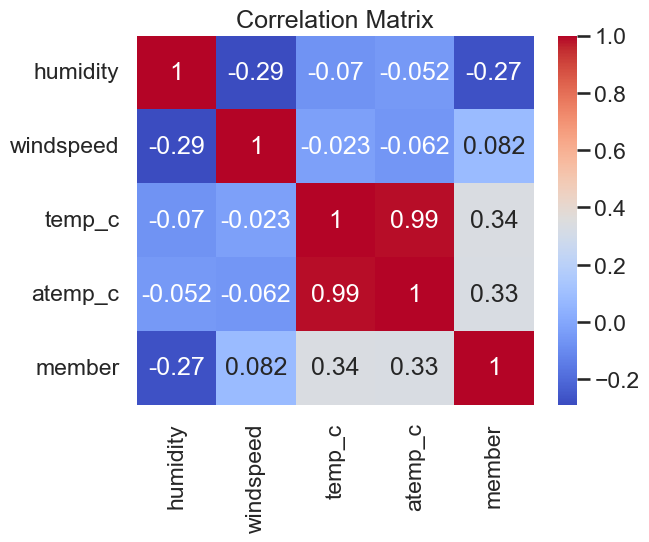

In [248]:
corr_matrix = Bike_Sharing_hour[['humidity', 'windspeed', 'temp_c', 'atemp_c', 'member']].corr()
print(corr_matrix)

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


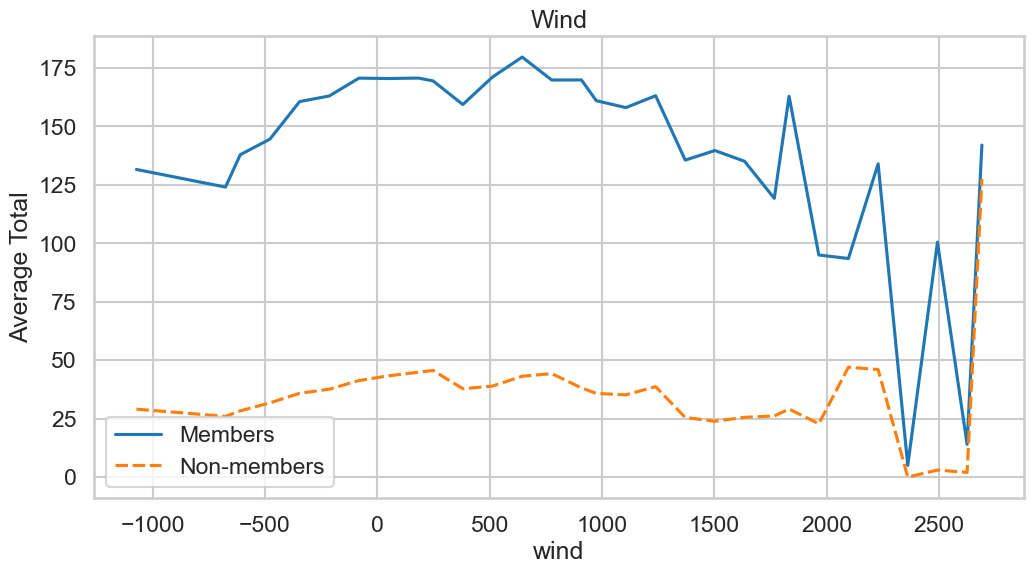

In [252]:
# Group the data by hour and calculate the average count for members and non-members
hourly_data = Bike_Sharing_hour.groupby('windspeed')[['member', 'non_member']].mean()

# Plot the hourly trend for members and non-members
plt.figure(figsize=(12,6))
sns.lineplot(data=hourly_data)
plt.xlabel('wind')
plt.ylabel('Average Total')
plt.title('Wind')
plt.legend(['Members', 'Non-members'])
plt.show()

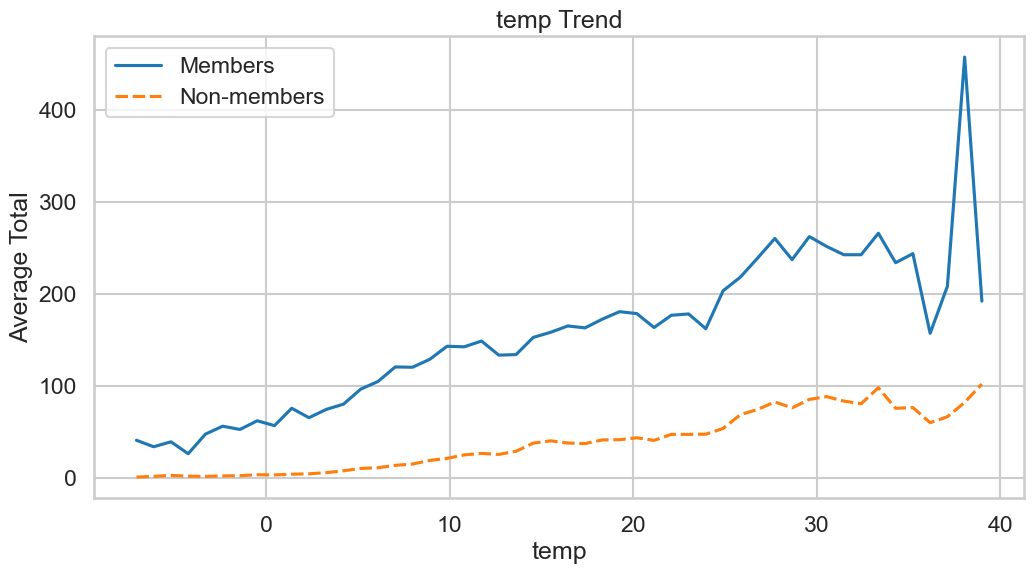

In [260]:
# Group the data by hour and calculate the average count for members and non-members
hourly_data = Bike_Sharing_hour.groupby('temp_c')[['member', 'non_member']].mean()

# Plot the hourly trend for members and non-members
plt.figure(figsize=(12,6))
sns.lineplot(data=hourly_data)
plt.xlabel('temp')
plt.ylabel('Average Total')
plt.title('temp Trend')
plt.legend(['Members', 'Non-members'])
plt.show()

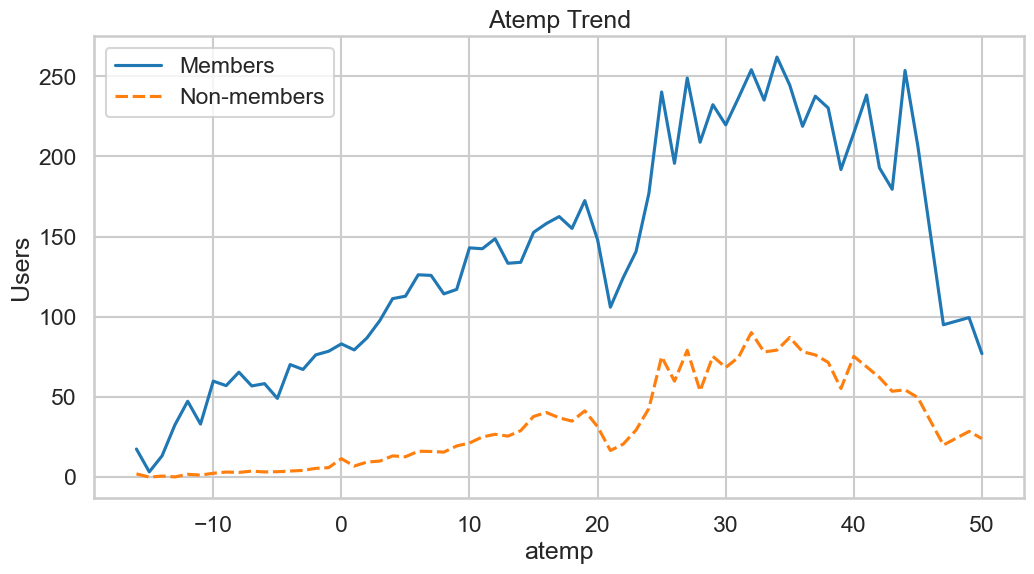

In [258]:
# Group the data by hour and calculate the average count for members and non-members
hourly_data = Bike_Sharing_hour.groupby('atemp_c')[['member', 'non_member']].mean()

# Plot the hourly trend for members and non-members
plt.figure(figsize=(12,6))
sns.lineplot(data=hourly_data)
plt.xlabel('atemp')
plt.ylabel('Users')
plt.title('Atemp Trend')
plt.legend(['Members', 'Non-members'])
plt.show()